In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Data cleansing
2. EDA
3. Analysis

In [2]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv", index_col=0)
print(df.shape)
df.head()

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 1. Data cleansing

In [3]:
df.groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
0.0,3,3,3,3,3,3,3,3
1.0,2,2,2,2,2,2,2,2
2.0,3,3,3,3,3,3,3,3
3.0,7,7,7,7,7,7,7,7
4.0,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
2014.0,580,580,580,578,580,580,580,580
2015.0,609,609,606,609,609,609,609,609
2016.0,339,339,339,337,339,339,339,339


In [4]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Year는 Platform과 연관관계가 있기 때문에, Platform을 이용하여 Year의 결측치를 채워 넣음.

In [5]:
year_of_platform_median = df.groupby("Platform")["Year"].median()
year_of_platform_median

Platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2009.0
PCFX    1996.0
PS      1998.0
PS2     2004.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: Year, dtype: float64

In [6]:
# Platform에 해당하는 Year를 np_Platfrom_median으로 지정.
np_Year = np.array(df["Year"])
np_Platform = np.array(df["Platform"])
dict_median = year_of_platform_median.to_dict()
np_Platfrom_median = np.array([dict_median[x] for x in np_Platform])

In [7]:
#게임이 해당하는 Platform의 median값을 얻음
np_Platfrom_median

array([2008., 2009., 2009., ..., 2011., 2014., 1998.])

In [7]:
sum(np.isnan(np_Year))

271

In [8]:
# 결측치를 0으로 수정
np.nan_to_num(np_Year, 0)
# Platform의 수명을 보수적으로 15년으로 고려하여, 테이블에 있는 Year값이 [median - 7, median + 7]을 벗어나면 median 값으로 수정 함
np_Year = np.where(np.abs(np_Platfrom_median - np_Year) > 7 , np_Platfrom_median, np_Year)

In [9]:
sum(np.isnan(np_Year))

0

In [10]:
'''
for idx, (platform, year) in df[["Platform", "Year"]].iterrows():        
    if year == None or year_of_platform_median.loc[platform].values - year > 30:
        df.iloc[idx-1, df.columns.get_loc("Year")] = year_of_platform_median.loc[platform].values    
'''

    

'\nfor idx, (platform, year) in df[["Platform", "Year"]].iterrows():        \n    if year == None or year_of_platform_median.loc[platform].values - year > 30:\n        df.iloc[idx-1, df.columns.get_loc("Year")] = year_of_platform_median.loc[platform].values    \n'

In [11]:
df["Year"] = np_Year

In [12]:
df.groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
1980.0,9,9,8,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46
1982.0,53,53,53,53,53,53,53,53
1983.0,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14
1985.0,12,12,12,12,12,12,12,12
1986.0,20,20,20,20,20,20,20,20
1986.5,2,2,2,2,2,2,2,2
1987.0,16,16,16,16,16,16,16,16


In [13]:
df.describe()

,Year
count,16598.000000
mean,2006.440354
std,5.806442
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2017.000000


Sales에 해당하는 열이 numeric한 값으로 설정 되어 있지 않음.  
따라서 수정 필요 함.

In [14]:
np_NA_Sales = np.array(df['NA_Sales'])
np_EU_Sales = np.array(df['EU_Sales'])
np_JP_Sales = np.array(df['JP_Sales'])
np_Other_Sales = np.array(df['Other_Sales'])

In [15]:
np_NA_Sales.shape

(16598,)

In [16]:
np_NA_Sales

array(['0.04', '0.17', '0', ..., '0.44', '0.05', '0'], dtype=object)

In [17]:
def convert_to_numeric(array):
    for idx, val in enumerate(array):
        if val[-1] == 'K':
            array[idx] = float(val[:-1]) * 1e3
        elif val[-1] == 'M':
            array[idx] = float(val[:-1]) * 1e6
        elif val[-1] == 'B':
            array[idx] = float(val[:-1]) * 1e9
        else:
            array[idx] = float(val)
        
    return array.astype(np.float64)

In [18]:
df['NA_Sales'] = convert_to_numeric(np_NA_Sales)
df['EU_Sales'] = convert_to_numeric(np_EU_Sales)
df['JP_Sales'] = convert_to_numeric(np_JP_Sales)
df['Other_Sales'] = convert_to_numeric(np_Other_Sales)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [20]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,1.659800e+04,1.659800e+04,1.659800e+04,16598.000000
mean,2006.440354,4.900248e+03,2.099193e+03,1.202631e+03,453.114244
std,5.806442,1.280374e+05,5.250814e+04,4.466015e+04,10148.004639
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2007.000000,8.000000e-02,2.000000e-02,0.000000e+00,0.010000
75%,2010.000000,2.500000e-01,1.100000e-01,4.000000e-02,0.040000
max,2017.000000,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000


Genre와 publisher의 결측치가 여전히 남아있음.

In [21]:
df.loc[df["Genre"].isna() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000.00,4.05,4.34,0.79
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.00,0.00
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.00,0.03
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0.00,0.00,0.00
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00


In [22]:
df.loc[df["Publisher"].isna() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00
1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0.00,0.00
1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.00,0.00
1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0.00,0.00
1880,Monster Hunter Frontier Online,PS3,2011.0,Role-Playing,NaN,0.00,0.00,0.05,0.00
1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01
2071,World of Tanks,X360,2010.0,Shooter,NaN,0.00,0.03,0.00,0.00
2971,Chou Soujuu Mecha MG,DS,2008.0,Simulation,NaN,0.00,0.00,0.06,0.00
3185,Action Man-Operation Extreme,PS,1998.0,Action,NaN,0.05,0.03,0.00,0.01
3413,Dance with Devils,PSV,2016.0,Action,NaN,0.00,0.00,0.01,0.00


In [23]:
original = np.array(df.groupby('Year').count()["Name"])
drop_row = np.array(df.dropna(axis=0).groupby("Year").count()["Name"])

결측치가 특정 장르나 연도에 편향되어 있다면 문제가 결측치가 포함된 행을 제거 할 수 없음.

In [24]:
original - drop_row

array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  5,  2,  1,  2,  3,  2, 25,  7,  3,  7, 10,  7,  9,  9,  5,
        2,  2,  3,  2,  0], dtype=int64)

In [25]:
original

array([   9,   46,   53,   17,   14,   12,   20,    2,   16,   13,    7,
         16,   41,   38,   60,  116,  213,  259,  294,  382,  336,  340,
        465,  826,  800,  831,  937, 1001, 1199, 1465, 1569, 1287, 1162,
        655,  557,  586,  612,  339,    3], dtype=int64)

In [26]:
np.around((original - drop_row)/original, 3)

array([0.111, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004,
       0.   , 0.013, 0.006, 0.003, 0.004, 0.004, 0.002, 0.03 , 0.007,
       0.003, 0.006, 0.007, 0.004, 0.007, 0.008, 0.008, 0.004, 0.003,
       0.005, 0.006, 0.   ])

하지만 확인 결과 결측치는 넓게 퍼져 있고 특정 년도에 최대 3퍼센트 정도만 차지 함.  
따라서 결측치가 포함된 행을 제거해도 충분히 많은 데이터가 남아있음. 

In [27]:
print(df.shape)
df = df.dropna(axis=0)

(16598, 9)


In [28]:
df.shape

(16490, 9)

In [29]:
df.groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
1980.0,8,8,8,8,8,8,8,8
1981.0,46,46,46,46,46,46,46,46
1982.0,53,53,53,53,53,53,53,53
1983.0,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14
1985.0,12,12,12,12,12,12,12,12
1986.0,20,20,20,20,20,20,20,20
1986.5,2,2,2,2,2,2,2,2
1987.0,16,16,16,16,16,16,16,16


과거의 데이터는 최근 게임의 유행을 반영하지 않고 있기 때문에 고려할 필요가 없음.  
따라서 제거 함.

In [30]:
df = df.loc[(df["Year"] >= 2006) & (df["Year"] <= 2016)]
df.groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
2006.0,998,998,998,998,998,998,998,998
2007.0,1192,1192,1192,1192,1192,1192,1192,1192
2008.0,1455,1455,1455,1455,1455,1455,1455,1455
2009.0,1562,1562,1562,1562,1562,1562,1562,1562
2010.0,1278,1278,1278,1278,1278,1278,1278,1278
2011.0,1153,1153,1153,1153,1153,1153,1153,1153
2012.0,650,650,650,650,650,650,650,650
2013.0,555,555,555,555,555,555,555,555
2014.0,584,584,584,584,584,584,584,584


In [31]:
df.reset_index(drop=True, inplace=True)

## 2. EDA

In [32]:
print(df.shape)
df.head()

(10373, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [33]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df["JP_Sales"] + df["Other_Sales"]
df['Total_Sales']

0        0.04
1        0.18
2        0.02
3        0.04
4        0.25
         ... 
10368    0.05
10369    0.02
10370    0.20
10371    0.79
10372    0.38
Name: Total_Sales, Length: 10373, dtype: float64

In [34]:
genre_list = list(df["Genre"].value_counts().index)
genre_list

['Action',
 'Sports',
 'Misc',
 'Adventure',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Racing',
 'Strategy',
 'Fighting',
 'Puzzle',
 'Platform']

In [35]:
year_list = sorted(list(df["Year"].value_counts().index))
year_list

[2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [36]:
genre_over_year = pd.DataFrame(index=genre_list)
genre_over_year

""
Action
Sports
Misc
Adventure
Role-Playing
Shooter
Simulation
Racing
Strategy
Fighting


In [37]:
df.loc[df["Year"] == 2006].groupby("Genre")["Name"].count()

Genre
Action          182
Adventure        71
Fighting         54
Misc            109
Platform         54
Puzzle           42
Racing           75
Role-Playing    108
Shooter          67
Simulation       57
Sports          137
Strategy         42
Name: Name, dtype: int64

In [38]:
df.loc[df["Year"] == 2007].groupby("Genre")["Name"].count()

Genre
Action          210
Adventure        84
Fighting         50
Misc            150
Platform         42
Puzzle           63
Racing           83
Role-Playing    103
Shooter          84
Simulation       90
Sports          167
Strategy         66
Name: Name, dtype: int64

In [39]:
 for year in year_list:
    genre_over_year[str(int(year))] = df.loc[df["Year"] == year].groupby("Genre")["Name"].count()

In [40]:
genre_over_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Action,182,210,227,293,232,246,263,151,188,250,117.0
Sports,137,167,200,198,190,125,54,53,55,63,37.0
Misc,109,150,211,222,203,189,37,43,41,38,17.0
Adventure,71,84,166,147,153,107,57,61,75,53,33.0
Role-Playing,108,103,118,113,100,95,78,71,92,77,40.0
Shooter,67,84,83,105,86,94,47,60,48,35,31.0
Simulation,57,90,125,136,83,55,18,21,11,15,9.0
Racing,75,83,83,90,60,66,30,17,27,20,19.0
Strategy,42,66,52,91,53,47,15,19,8,17,10.0
Fighting,54,50,56,58,41,50,29,19,22,21,14.0


In [41]:
genre_over_year.fillna(0, inplace=True)
genre_over_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Action,182,210,227,293,232,246,263,151,188,250,117.0
Sports,137,167,200,198,190,125,54,53,55,63,37.0
Misc,109,150,211,222,203,189,37,43,41,38,17.0
Adventure,71,84,166,147,153,107,57,61,75,53,33.0
Role-Playing,108,103,118,113,100,95,78,71,92,77,40.0
Shooter,67,84,83,105,86,94,47,60,48,35,31.0
Simulation,57,90,125,136,83,55,18,21,11,15,9.0
Racing,75,83,83,90,60,66,30,17,27,20,19.0
Strategy,42,66,52,91,53,47,15,19,8,17,10.0
Fighting,54,50,56,58,41,50,29,19,22,21,14.0


<AxesSubplot:title={'center':'Annual game release by genre'}>

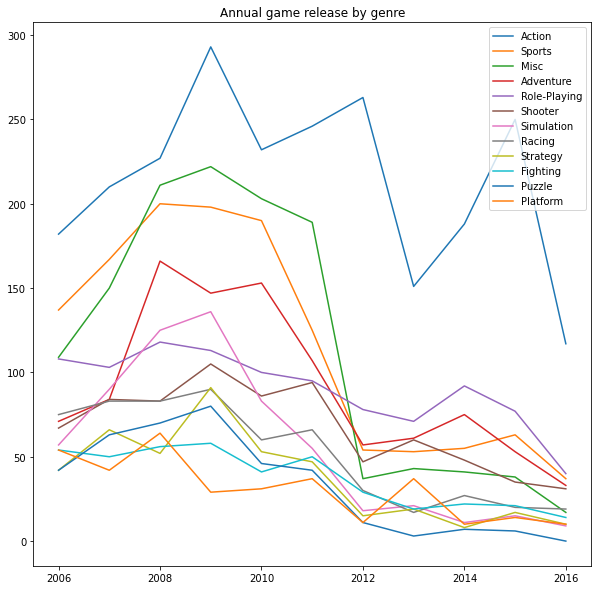

In [42]:
genre_over_year.T.plot(title="Annual game release by genre", figsize=(10,10))

해마다 많은 Action 장르 게임이 출시되고 있음.  

In [43]:
df.loc[df["Genre"] == "Action"].groupby("Year").mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
2006.0,6483.710330,55.025385,549.481648,824.212747,7912.430110
2007.0,1476.468286,904.884048,0.029190,238.168190,2619.549714
2008.0,5418.818458,6343.777004,44.080925,1365.718899,13172.395286
2009.0,2901.293106,887.521945,0.039078,1433.507133,5222.361263
2010.0,0.267629,732.916121,0.036983,603.504224,1336.724957
2011.0,1260.385203,853.830122,40.696748,284.609146,2439.521220
2012.0,7148.480038,10304.332890,2091.299240,0.053764,19544.165932
2013.0,63775.128079,1854.603510,794.773311,132.551987,66557.056887
2014.0,106.588883,266.172553,0.034681,0.070745,372.866862


(584, 10)

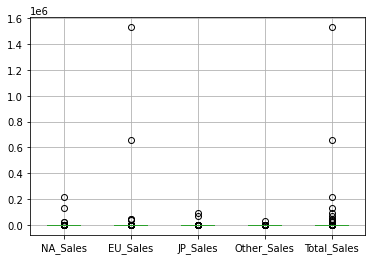

In [44]:
sales_on_2014 = df.loc[df["Year"] == 2014]
sales_on_2014.boxplot(column=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Total_Sales"])
sales_on_2014.shape

몇몇 게임이 높은 판매량을 보이고 있지만, outlier이기 때문에 제거 함.  
즉, 특정 장르로 출시된 어떤 게임이 높은 판매량을 보였다고 해서, 게임들이 특정 장르로 출시되었을 때 높은 판매량을 보인다는것을 증명 할 수 없음.  
게임(필요조건) -> 장르(충분조건)  
게임이 높은 판매량을 보였다. -> 이 게임이 해당하는 장르가 높은 판매량을 보인다. (O)  
특정 장르가 높은 판매량을 보였다. -> 특정 장르에 해당하는 게임이 높은 판매량을 보였다. ($\Delta$))  

<AxesSubplot:>

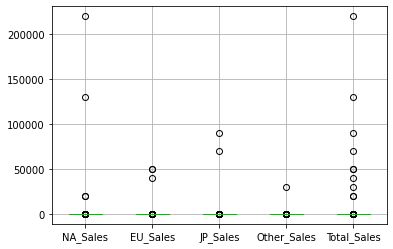

In [45]:
sales_on_2014 = sales_on_2014[sales_on_2014["EU_Sales"] < 0.6 * 1e6]
sales_on_2014.boxplot(column=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Total_Sales"])

In [46]:
sales_on_2014.shape

(582, 10)

In [47]:
sales_on_2014.groupby("Genre").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2014.0,106.588883,266.172553,0.034681,0.070745,372.866862
Adventure,2014.0,0.025867,666.694133,0.018133,0.009067,666.747200
Fighting,2014.0,0.313182,1818.319545,7272.920909,0.063182,9091.616818
Misc,2014.0,0.230000,0.216341,0.057561,0.074878,0.578780
Platform,2014.0,0.302000,0.363000,0.126000,0.096000,0.887000
Puzzle,2014.0,0.088571,0.052857,0.058571,0.014286,0.214286
Racing,2014.0,0.217037,0.285185,0.054074,0.062593,0.618889
Role-Playing,2014.0,217.539891,0.122717,0.193804,326.123804,543.980217
Shooter,2014.0,4783.191957,0.516957,0.021087,0.169565,4783.899565


<AxesSubplot:title={'center':'2014 share by genre'}, ylabel='Total_Sales'>

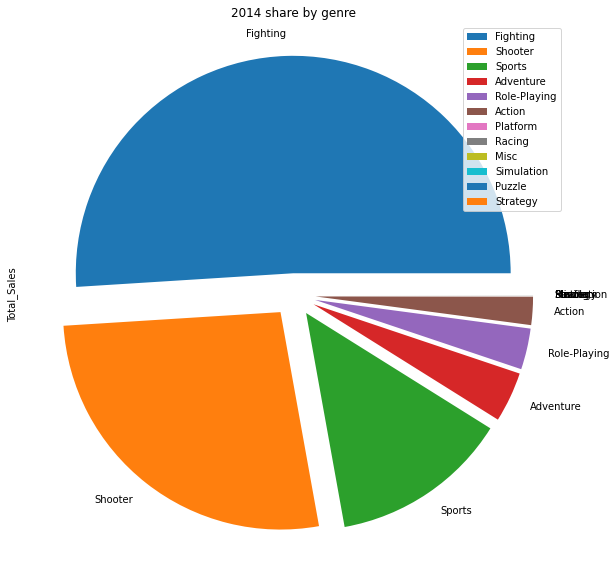

In [48]:
sales_on_2014.groupby("Genre").mean().sort_values(['Total_Sales'], ascending=False).plot.pie(
    title="2014 share by genre",
    y='Total_Sales',
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2014.groupby("Genre").mean()))]
)

(609, 10)


<AxesSubplot:>

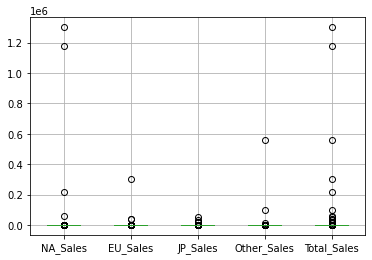

In [49]:
sales_on_2015 = df.loc[df["Year"] == 2015]
print(sales_on_2015.shape)
sales_on_2015.boxplot(column=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Total_Sales"])

In [50]:
sales_on_2015 = sales_on_2015[sales_on_2015["NA_Sales"] < 1e6]
sales_on_2015.shape

(607, 10)

In [51]:
sales_on_2015.groupby("Genre").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2015.0,1120.086200,160.095280,0.062160,440.027440,1720.271080
Adventure,2015.0,0.052075,0.063396,377.377736,0.016038,377.509245
Fighting,2015.0,0.171429,0.113333,952.417619,0.048095,952.750476
Misc,2015.0,0.126579,0.097632,0.051316,0.027368,0.302895
Platform,2015.0,0.101538,3076.992308,0.027692,0.019231,3077.140769
Puzzle,2015.0,0.008333,0.018333,0.086667,0.001667,0.115000
Racing,2015.0,0.098500,0.239000,0.014000,0.047000,0.398500
Role-Playing,2015.0,0.173377,0.162597,1039.046494,7272.770000,8312.152468
Shooter,2015.0,0.905588,0.712647,0.079118,0.247353,1.944706


<AxesSubplot:title={'center':'2015 share by genre'}, ylabel='Total_Sales'>

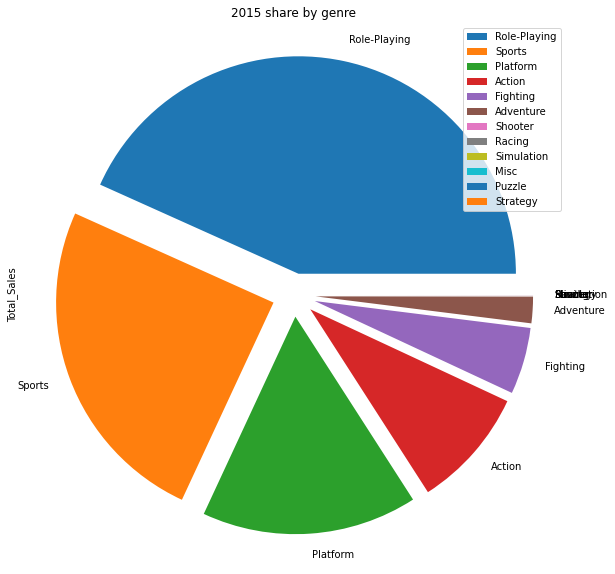

In [52]:
sales_on_2015.groupby("Genre").mean().sort_values(['Total_Sales'], ascending=False).plot.pie(
    title="2015 share by genre",
    y='Total_Sales',
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2015.groupby("Genre").mean()))]
)

<AxesSubplot:>

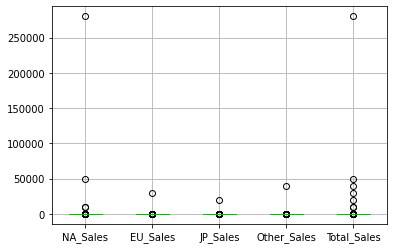

In [53]:
sales_on_2016 = df.loc[df["Year"] == 2016]
sales_on_2016.boxplot(column=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Total_Sales"])

In [54]:
sales_on_2016 = sales_on_2016[sales_on_2016["NA_Sales"] < 250000]

In [55]:
sales_on_2016.loc[df["Year"] == 2016].groupby("Genre").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2016.0,427.400171,0.054359,170.989316,0.015641,598.459487
Adventure,2016.0,0.010303,0.011818,0.028788,0.003333,0.054242
Fighting,2016.0,0.114286,0.082143,0.045714,0.032857,0.275000
Misc,2016.0,0.012941,0.005294,0.044118,0.001765,0.064118
Platform,2016.0,0.079000,0.087000,0.011000,0.031000,0.208000
Racing,2016.0,0.017368,0.057895,0.000526,0.009474,0.085263
Role-Playing,2016.0,0.034750,750.031500,0.090750,0.011000,750.168000
Shooter,2016.0,645.358710,0.181613,0.013871,1290.378387,1935.932581
Simulation,2016.0,0.000000,0.010000,0.033333,0.000000,0.043333


<AxesSubplot:title={'center':'2016 share by genre'}, ylabel='Total_Sales'>

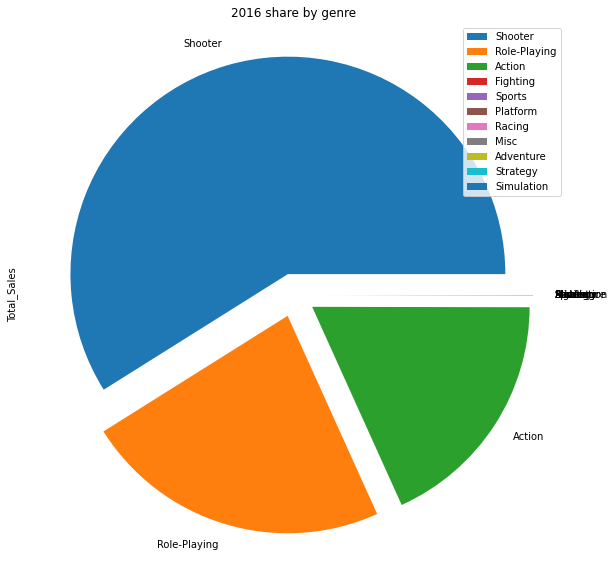

In [56]:
sales_on_2016.groupby("Genre").mean().sort_values(['Total_Sales'], ascending=False).plot.pie(
    title="2016 share by genre",
    y='Total_Sales',
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2016.groupby("Genre").mean()))],
    legend=True
)

해마다 인기 있는 장르(가장 판매량이 많은 장르)는 계속 바뀌고 있지만 Action 장르는 꾸준한 판매를 보여주고 있음.  
Shooter와 Sports도 기복이 있지만 많은 판매량을 보임.  
최근 2년간 Role-Playing 게임이 높은 판매량을 보여줌.  


In [57]:
sales_on_2014.groupby("Platform").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
3DS,2014.0,0.154231,0.110256,0.264615,0.023590,0.552692
DS,2014.0,0.020000,0.000000,0.000000,0.000000,0.020000
PC,2014.0,0.077273,0.195909,0.000000,0.029773,0.302955
PS3,2014.0,377.503868,0.187830,1509.486509,0.073396,1887.251604
PS4,2014.0,0.440946,676.273108,0.039324,0.225000,676.978378
PSP,2014.0,0.000000,0.000000,0.024000,0.000000,0.024000
PSV,2014.0,1203.735370,370.404352,0.059074,277.797130,1851.995926
Wii,2014.0,0.303333,0.375000,0.000000,0.060000,0.738333
WiiU,2014.0,0.347742,1613.110968,0.101935,0.068065,1613.628710


<AxesSubplot:title={'center':'2014 share by platform'}, ylabel='Total_Sales'>

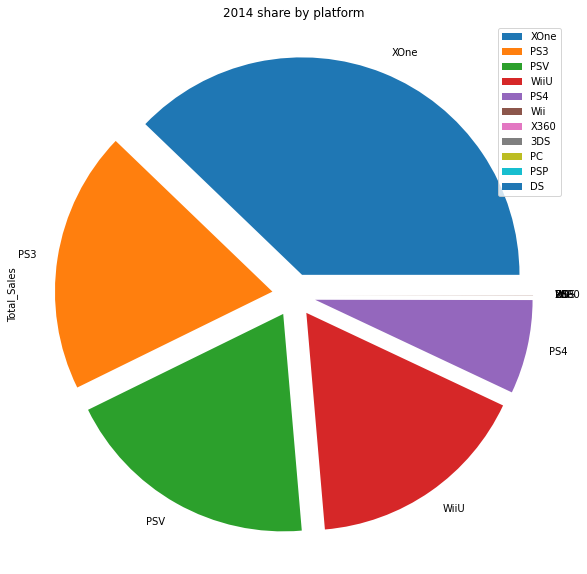

In [58]:
sales_on_2014.groupby("Platform").mean().sort_values(["Total_Sales"], ascending=False).plot.pie(
    title="2014 share by platform",
    y="Total_Sales",
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2014.groupby("Platform").mean()))]
)

In [59]:
sales_on_2015.groupby("Platform").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
3DS,2015.0,0.068471,470.643882,588.414000,0.011647,1059.138000
PC,2015.0,0.044000,0.105600,0.000000,0.011000,0.160600
PS3,2015.0,833.398611,0.102917,277.828056,0.032639,1111.362222
PS4,2015.0,1594.500000,2464.129783,217.434130,4782.733478,9058.797391
PSP,2015.0,0.000000,0.000000,0.040000,0.000000,0.040000
PSV,2015.0,0.004909,0.011545,181.860727,0.004364,181.881545
Wii,2015.0,0.142500,0.217500,0.000000,0.030000,0.390000
WiiU,2015.0,0.207037,0.149259,0.091852,0.040370,0.488519
X360,2015.0,0.177750,0.119250,0.000000,0.028500,0.325500


<AxesSubplot:title={'center':'2015 share by platform'}, ylabel='Total_Sales'>

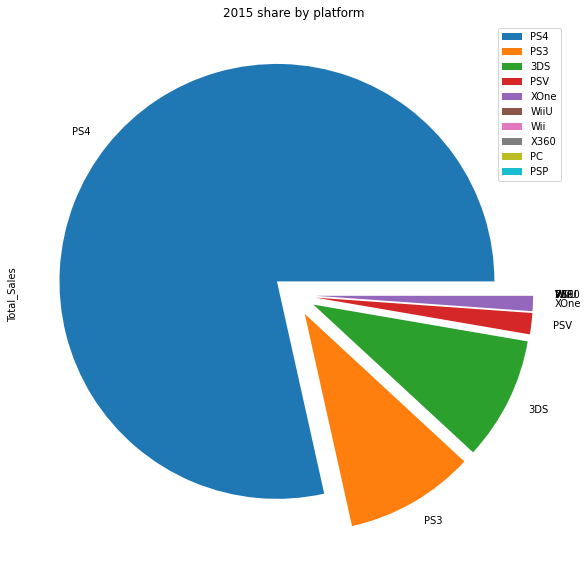

In [60]:
sales_on_2015.groupby("Platform").mean().sort_values(["Total_Sales"], ascending=False).plot.pie(
    title="2015 share by platform",
    y="Total_Sales",
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2015.groupby("Platform").mean()))]
)

In [61]:
sales_on_2016.groupby("Platform").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
3DS,2016.0,0.024412,0.016765,0.147647,0.003529,0.192353
PC,2016.0,0.022105,0.041842,0.000000,0.004474,0.068421
PS3,2016.0,0.012903,0.025806,0.034516,0.007097,0.080323
PS4,2016.0,673.175096,288.572981,192.345865,384.657115,1538.751058
PSV,2016.0,0.003333,0.005263,0.044737,0.002456,0.055789
WiiU,2016.0,0.149000,0.099000,0.055000,0.025000,0.328000
X360,2016.0,0.045000,0.050000,0.000000,0.008750,0.103750
XOne,2016.0,0.123889,0.085741,0.000185,0.019444,0.229259


<AxesSubplot:title={'center':'2016 share by platform'}, ylabel='Total_Sales'>

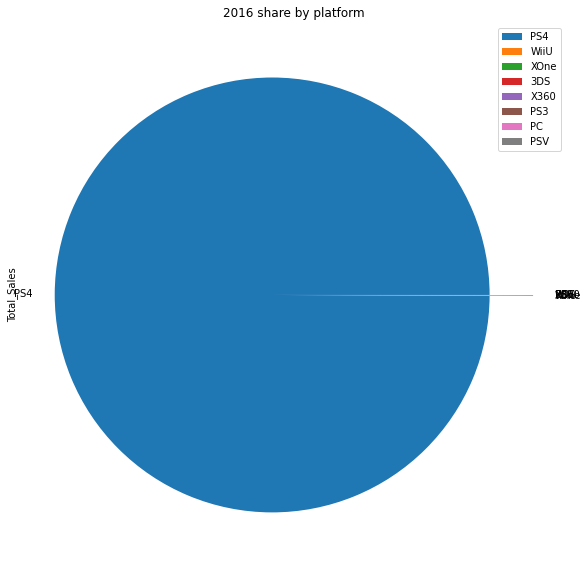

In [62]:
sales_on_2016.groupby("Platform").mean().sort_values(["Total_Sales"], ascending=False).plot.pie(
    title="2016 share by platform",
    y="Total_Sales",
    figsize=(10, 10),
    explode=[0.1 for _ in range(len(sales_on_2016.groupby("Platform").mean()))]
)

2016년 이후 새로운 platform이 나온것이 아니라면 PS4로 출시하는 것이 좋음.

그렇다면 PS4에서 어떤 장르의 게임을 출시해야 할까?

In [63]:
sales_on_2016.loc[df["Platform"] == "PS4"].groupby("Genre").mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2016.0,1351.420811,0.094324,540.564324,0.031892,1892.111351
Adventure,2016.0,0.036000,0.036000,0.038000,0.014000,0.124000
Fighting,2016.0,0.150000,0.126667,0.058333,0.056667,0.391667
Misc,2016.0,0.002000,0.000000,0.040000,0.000000,0.042000
Platform,2016.0,0.130000,0.195000,0.015000,0.065000,0.405000
Racing,2016.0,0.016667,0.098333,0.001667,0.021667,0.138333
Role-Playing,2016.0,0.066923,2307.757692,0.113077,0.026923,2307.964615
Shooter,2016.0,1666.905000,0.298333,0.030000,3333.435000,5000.668333
Simulation,2016.0,0.000000,0.003333,0.036667,0.000000,0.040000


2016년 PS4의 점유율이 매우 높기 때문에 PS4의 장르별 판매비율이 2016년 장르별 판매 비율과 유사한 분포를 보일것이라고 생각됨.  

새로운 플랫폼이 출시된게 아니라면 PS4를 기반으로 Role-Playing이나 Shooter 게임이 실패 할 확률이 낮음.  
또는 Sports 게임의 판매량이 2016년에는 낮았지만, 과거에는 꾸준한 판매량을 보여주었기 때문에 고려해 볼 수 있음.  

지역에 따라 선호하는 장르가 다를까?  
지역에 따라 선호하는 장르가 있다는것을 확인하기 위해서는, 년도가 바뀌어도 꾸준한 판매량을 보여야 함.  
하지만 해마다 많이 판매된 장르가 다르기 때문에 지역과 선호하는 장르는 상관 관계가 적다고 생각 됨.  

어떤 게임이 매출이 높을까?

In [64]:
df.loc[df["Year"] == 2016].sort_values(['Total_Sales'], ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9664,FIFA 17,PS4,2016.0,Sports,Electronic Arts,280000.00,3.75,0.06,0.69,280004.50
1197,Song of the Deep,PS4,2016.0,Action,Insomniac Games,50000.00,0.00,0.00,0.01,50000.01
2175,Battleborn,PS4,2016.0,Shooter,Take-Two Interactive,0.09,0.08,0.01,40000.00,40000.18
5881,Odin Sphere: Leifthrasir,PS4,2016.0,Role-Playing,Nippon Ichi Software,0.06,30000.00,0.07,0.02,30000.15
9404,Resident Evil: Umbrella Corps,PS4,2016.0,Action,Capcom,0.00,0.00,20000.00,0.00,20000.00
1942,Destiny: The Collection,PS4,2016.0,Shooter,Activision,10000.00,0.04,0.00,0.01,10000.05
5577,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,10000.00,0.00,0.00,0.00,10000.00
2044,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
10273,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14
7332,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00


In [65]:
sales_on_2014.sort_values(['Total_Sales'], ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5581,Alien: Isolation,XOne,2014.0,Shooter,Sega,220000.00,0.24,0.00,0.04,220000.28
1165,FIFA 15,PSV,2014.0,Sports,Electronic Arts,130000.00,0.48,0.04,0.19,130000.71
7803,Naruto Shippuden: Ultimate Ninja Storm Revolution,PS3,2014.0,Fighting,Namco Bandai Games,0.15,0.16,90000.00,0.08,90000.39
4211,Guilty Gear Xrd: Sign,PS3,2014.0,Fighting,Arc System Works,0.09,0.00,70000.00,0.02,70000.11
83,Warriors Orochi 3,PS4,2014.0,Action,Tecmo Koei,0.04,50000.00,0.04,0.02,50000.10
8165,How to Train Your Dragon 2,WiiU,2014.0,Adventure,Little Orbit,0.04,50000.00,0.00,0.01,50000.05
6031,Dragon Ball Z: Battle of Z,PSV,2014.0,Fighting,Namco Bandai Games,0.00,40000.00,0.06,0.02,40000.08
9122,Dungeon Travelers 2: The Royal Library & The M...,PSV,2014.0,Role-Playing,Atlus,0.07,0.03,0.05,30000.00,30000.15
7952,Deception IV: Blood Ties,PS3,2014.0,Action,Tecmo Koei,20000.00,0.02,0.06,0.01,20000.09
7959,Risen 3: Titan Lords,PS3,2014.0,Role-Playing,Deep Silver,20000.00,0.06,0.00,0.02,20000.08


In [66]:
sales_on_2015.sort_values(['Total_Sales'], ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9723,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,560000.00,560003.17
6203,Madden NFL 16,PS4,2015.0,Sports,Electronic Arts,2.33,300000.00,0.00,0.59,300002.92
4108,LEGO Dimensions,PS4,2015.0,Action,Warner Bros. Interactive Entertainment,220000.00,0.32,0.00,0.10,220000.42
5235,God of War III,PS4,2015.0,Action,Sony Computer Entertainment,0.23,0.29,0.01,100000.00,100000.53
27,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60000.00,0.08,0.16,0.03,60000.27
983,Stella Glow,3DS,2015.0,Role-Playing,Atlus,0.16,0.01,50000.00,0.02,50000.19
4974,Shovel Knight,3DS,2015.0,Platform,Yacht Club Games,0.07,40000.00,0.01,0.01,40000.09
6352,Saints Row: Gat out of Hell,PS4,2015.0,Action,Deep Silver,0.00,40000.00,0.00,0.01,40000.01
8128,Exist Archive: The Other Side of the Sky,PS4,2015.0,Role-Playing,Aksys Games,0.00,0.00,30000.00,0.00,30000.00
2000,Amatsumi Sora ni! Kumo no Hatate ni,PSV,2015.0,Adventure,Prototype,0.00,0.00,20000.00,0.00,20000.00


In [67]:
sales_on_2016.sort_values(['Total_Sales'], ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1197,Song of the Deep,PS4,2016.0,Action,Insomniac Games,50000.00,0.00,0.00,0.01,50000.01
2175,Battleborn,PS4,2016.0,Shooter,Take-Two Interactive,0.09,0.08,0.01,40000.00,40000.18
5881,Odin Sphere: Leifthrasir,PS4,2016.0,Role-Playing,Nippon Ichi Software,0.06,30000.00,0.07,0.02,30000.15
9404,Resident Evil: Umbrella Corps,PS4,2016.0,Action,Capcom,0.00,0.00,20000.00,0.00,20000.00
1942,Destiny: The Collection,PS4,2016.0,Shooter,Activision,10000.00,0.04,0.00,0.01,10000.05
5577,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,10000.00,0.00,0.00,0.00,10000.00
2044,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
10273,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14
7332,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00
1768,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.72


일반적으로 전작이 흥행한 경우 후속작이 높은 판매량을 보여줌.  
2016년에는 후속작으로 출시된 것이 아닌, 새로운 게임들(Song of the Deep, Battleborn, Odin Sphere: Leifthrasir)이 높은 판매량을 보여줌.  
하지만 마찬가지로 2016년에도, 후속작으로 출시된 게임들이 꾸준히 높은 판매량을 보임.  
따라서, 다음 분기에는 PS4 플랫폼에 Shooter, Action, Role-Playing 장르 게임의 후속작을 출시하면 높은 매출을 얻을 가능성이 높음.
